<a href="https://colab.research.google.com/github/rogerioMB-hub/google_colab/blob/main/Perceptron04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [20]:
# criando um dataset para classificação.
#     100 amostras
n_pts = 100
#     2 centros, relativamente próximos
centers = [[-0.5, 0.5], [0.5, -0.5]]
#     gerando o dataset, com 100 amostras, uma semente fixa aleatória (=123, p.ex.),
#        com dois centroides de pontos para geração de dados e com
#        um desvio padrao de 0.4 entre as amostras geradas (isso faz com que as
#        amostras não sejam todas geradas, precisamente, no mesmo ponto). Qto maior o
#        cluster_std, mais espalhadas elas ficam do ponto inicial escolhido.
pts_, labels_ = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

In [21]:
# plotar os pontos com labels 0 em azul e com labels 1 em verde
def scatter_plot():
  plt.scatter(pts_[labels_==0, 0], pts_[labels_==0,1], c="blue")
  plt.scatter(pts_[labels_==1, 0], pts_[labels_==1,1], c="green")
  plt.show()

In [22]:
# os dados, para uso em redes neurais devem ser apresentados na forma de tensores
pts_data = torch.Tensor(pts_)
labels_data = torch.Tensor(labels_)

# Criando a classe NET() que irá definir um modelo linear de rede (perceptron) - uma reta separando conjuntos

In [23]:
class Net(nn.Module):
  def __init__(self, input_size, output_size):
    super(Net, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # aplica a função de ativação sobre a função ou modelo linear proposto
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  # novo em perceptron04: predição de dados
  #   sendo 2 grupos a classificar, prob> 50% -> grupo 1, senão grupo 0.
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

# Criando um modelo com base na classe NET() - 2 entradas e uma saída

Temos duas informações de entrada e apenas uma informação de saída. Objetiva-se classificar uma amostra contendo 2 parametros em 2 conjuntos. A saída indicará se as amostras apontam para um indivíduo contido no primeiro ou no segundo grupo.

In [24]:
torch.manual_seed(2)
modelo = Net(2, 1)

# Obendo os parametros do modelo criado - objetivo é plotar gráfico da reta que separa conjuntos

In [25]:
[w, b] = list(modelo.parameters())
w1, w2 = w.view(2)
b1 = b[0]

def get_params():
  return (w1.item(), w2.item(), b1.item())

#print(get_params())


# Criando função para plotar reta.

Os parametros do modelo são obtidos com get_params() e os limites inf e sup dos pontos são obtidos visualmente dos pontos plotados no scatter()

In [26]:
def plot_fit(title):
  plt.title = title           # Não está funcionando.
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/(-w2)     # igual a 0, para achar x2, pq .....
  plt.plot(x1, x2, 'r')
  scatter_plot()


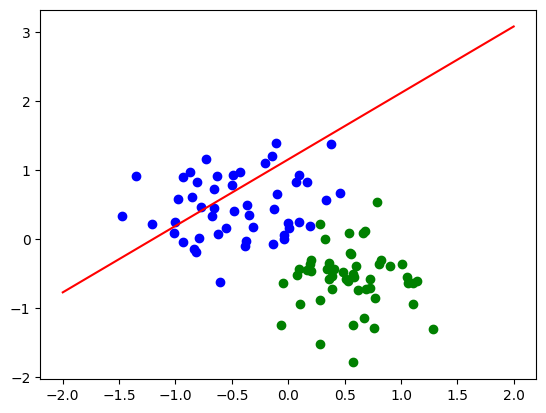

In [27]:
plot_fit('Inicial')

# O modelo linear não separa os conjuntos de forma eficiente. Para ajustar o modelo aos dados, aplica-se ***o gradiente descendente***. Para tanto, uma função de avaliação é necessária: a ***cross-entropy***

In [28]:
criterion = nn.BCELoss()  # binary cross entropy
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.01)

In [29]:
epochs = 1000  #
losses = []   #
for i in range(epochs):
  y_pred = modelo.forward(pts_data)
  loss = criterion(y_pred[:,0], labels_data)  # o tensor y_pred apresenta dimensao diferente,
                                              # do labels_data, logo modifiquei para ficar equivalente
  # ou poderia fazer isso:
  # labels_data = torch.Tensor(labels_).reshape(100,1)
  losses.append(loss.item())
  #print(f"Epoch {i+1}: {loss.item()}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

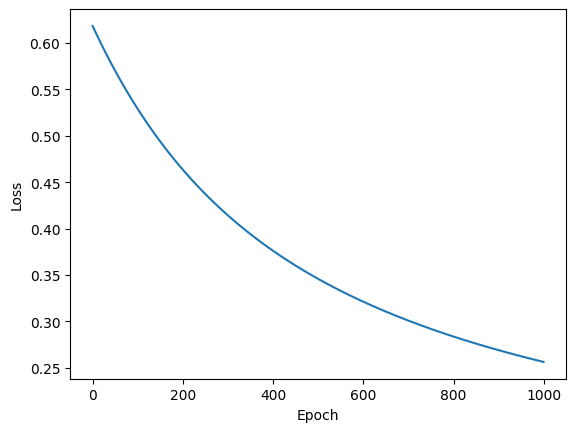

In [30]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

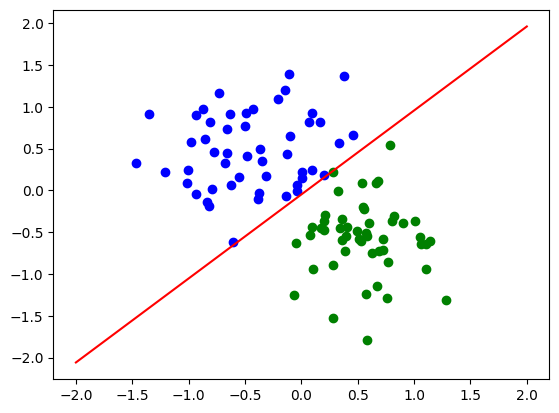

In [31]:
plot_fit('Final')


# Dando sequencia aos estudos, agora a parte de inferência

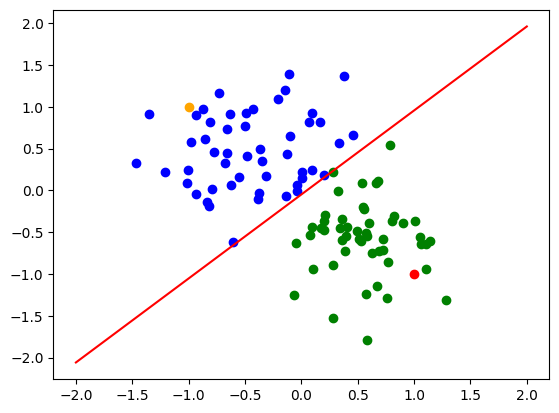

In [32]:
ponto1 = torch.Tensor([1.0, -1.0])
ponto2 = torch.Tensor([-1.0, 1.0])  # pontos de teste

plt.scatter(ponto1.numpy()[0], ponto1.numpy()[1], c="red")  # pontos de teste
plt.scatter(ponto2.numpy()[0], ponto2.numpy()[1], c="orange")

plot_fit('Modelo treinado')

In [43]:
print("Prob. pto1 (verm) estar no grupo 1 (verde): {} ".format(modelo.forward(ponto1).item()))
print("Prob. pto2 (larj) estar no grupo 1 (verde): {} ".format(modelo.forward(ponto2).item()))

# observar que probabilidade > 0.5 -> perctencer ao grupo 1 senão grupo 0
# mas já temos isto implementado (agora) na classe net(), logo ...
print("Ponto 1 está na classe {} ".format(modelo.predict(ponto1)))
print("Ponto 2 está na classe {} ".format(modelo.predict(ponto2)))

Prob. pto1 (verm) estar no grupo 1 (verde): 0.9424158334732056 
Prob. pto2 (larj) estar no grupo 1 (verde): 0.05055497586727142 
Ponto 1 está na classe 1 
Ponto 2 está na classe 0 
